<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Change_ID        100 non-null    object        
 1   Department       100 non-null    object        
 2   Change_Type      100 non-null    object        
 3   Priority         100 non-null    object        
 4   Submitted_Date   100 non-null    datetime64[ns]
 5   Status           100 non-null    object        
 6   Impact_Score     100 non-null    float64       
 7   Completed_Date   70 non-null     datetime64[ns]
 8   Resolution_Days  70 non-null     float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 7.2+ KB
None
  Change_ID  Department Change_Type Priority Submitted_Date  Status  \
0   CHG0001   Marketing      Policy   Medium     2024-01-27    Open   
1   CHG0002  Operations     Process   Medium     2024-01-21  Closed   
2   CHG0003          HR  

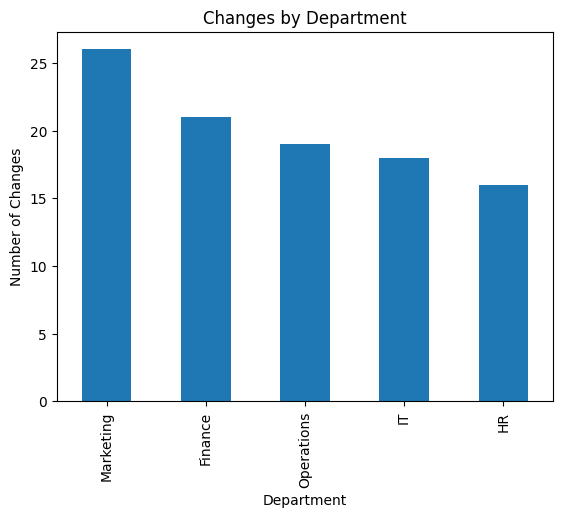

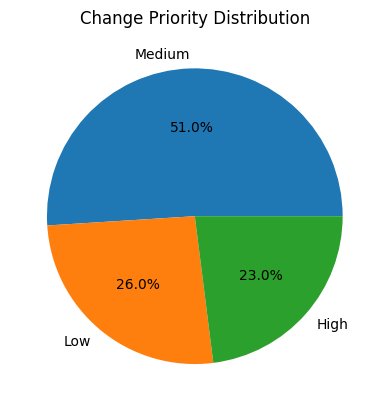

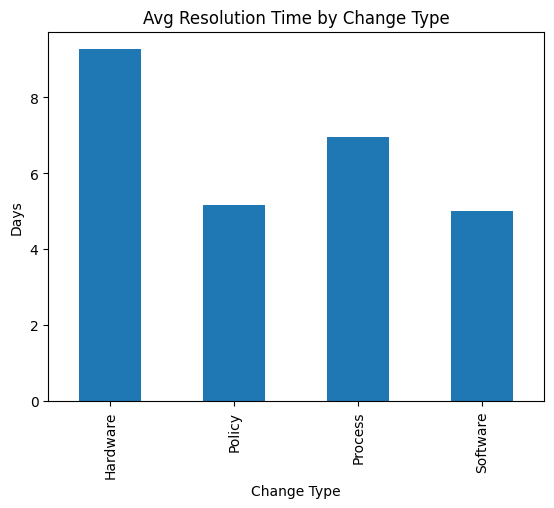

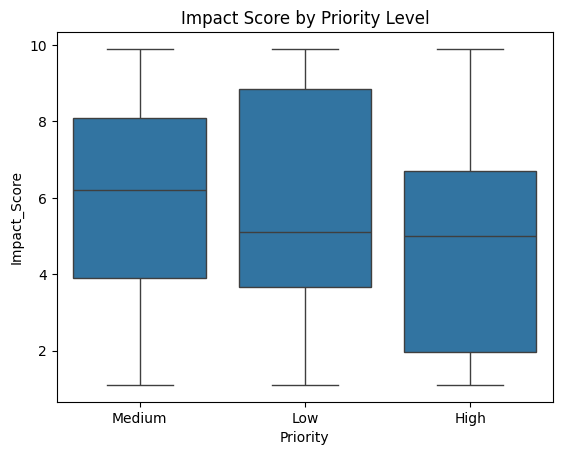

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/change_request_data.csv')

# Convert date columns
df['Submitted_Date'] = pd.to_datetime(df['Submitted_Date'])
df['Completed_Date'] = pd.to_datetime(df['Completed_Date'])

# Add duration column
df['Resolution_Days'] = (df['Completed_Date'] - df['Submitted_Date']).dt.days

# Basic info
print(df.info())
print(df.head())

# Plot 1: Changes by Department
df['Department'].value_counts().plot(kind='bar', title='Changes by Department')
plt.xlabel("Department")
plt.ylabel("Number of Changes")
plt.show()

# Plot 2: Priority Distribution
df['Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Change Priority Distribution')
plt.ylabel("")
plt.show()

# Plot 3: Average Resolution Time by Change Type
avg_res = df[df['Status'] == 'Closed'].groupby('Change_Type')['Resolution_Days'].mean()
avg_res.plot(kind='bar', title='Avg Resolution Time by Change Type')
plt.xlabel("Change Type")
plt.ylabel("Days")
plt.show()

# Plot 4: Impact Score by Priority
sns.boxplot(x='Priority', y='Impact_Score', data=df)
plt.title("Impact Score by Priority Level")
plt.show()

